In [2]:
# 1. Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 2. Load Dataset

df = pd.read_csv("Mall_Customers.csv")

# Drop CustomerID as it's not useful
df.drop("CustomerID", axis=1, inplace=True)

# Encode 'Genre' (Male/Female) to 0/1
le = LabelEncoder()
df["Genre"] = le.fit_transform(df["Genre"])  # Female=0, Male=1

Dataset Summary:
             Genre         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.440000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      0.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000


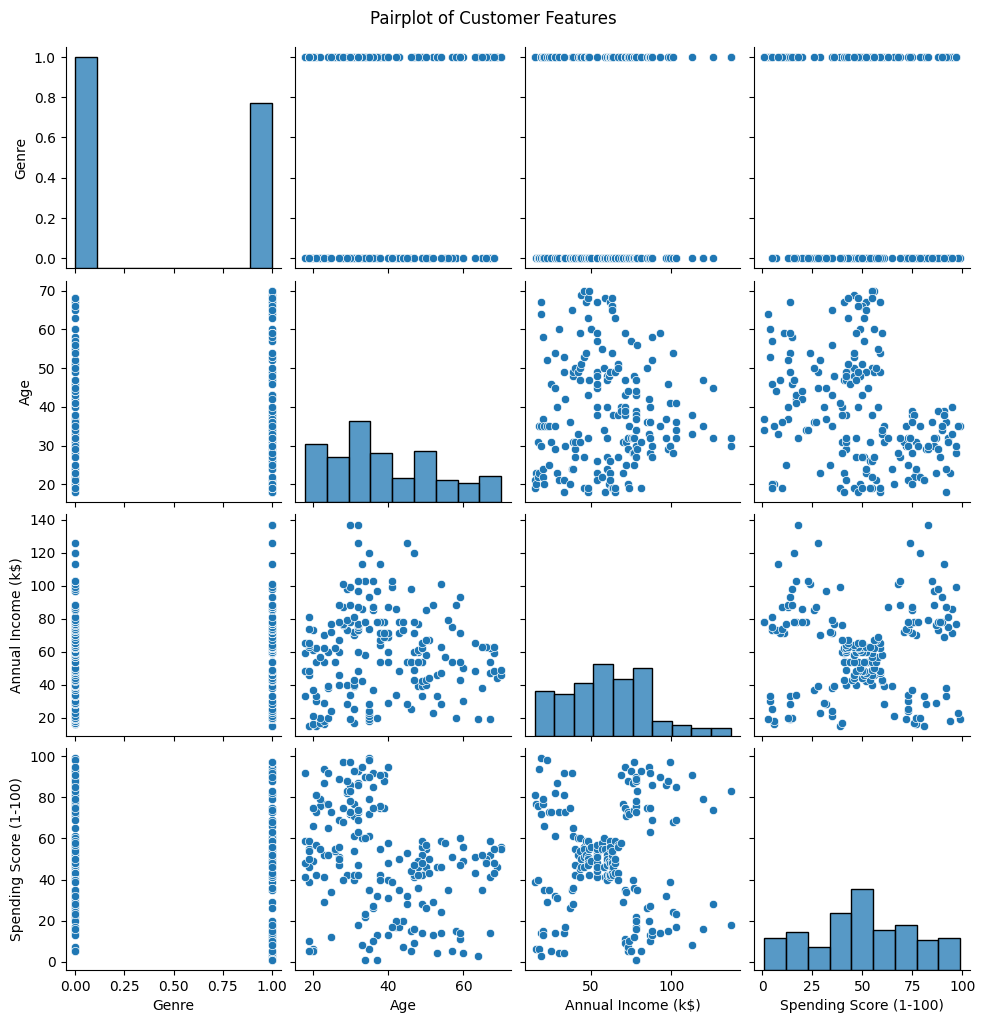

In [4]:
# 3. Exploratory Data Analysis (EDA)

print("Dataset Summary:\n", df.describe())
sns.pairplot(df)
plt.suptitle("Pairplot of Customer Features", y=1.02)
plt.show()

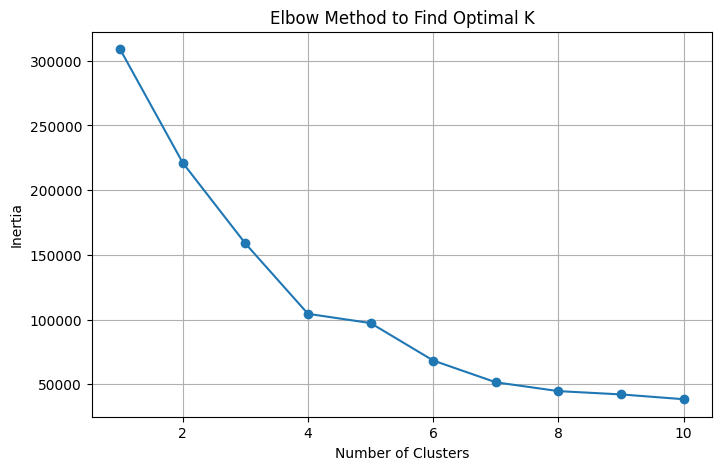

In [5]:
# 4. Elbow Method to Find Optimal Clusters

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method to Find Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [6]:
# 5. Apply K-Means Clustering (K = 5)

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

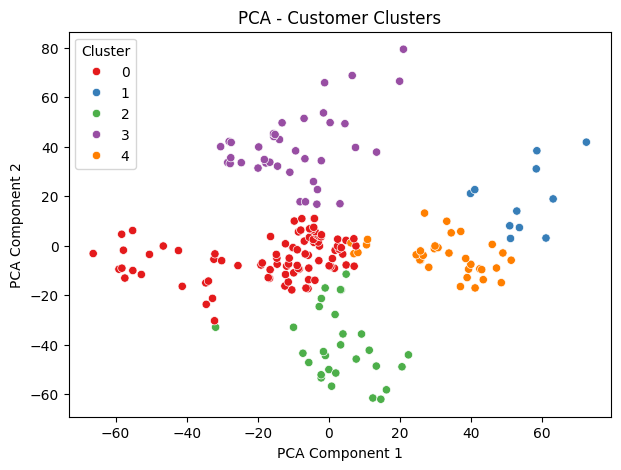

In [8]:
# 6. PCA Visualization

pca = PCA(n_components=2)
components = pca.fit_transform(df.drop("Cluster", axis=1))

plt.figure(figsize=(7, 5))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df["Cluster"], palette="Set1")
plt.title("PCA - Customer Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

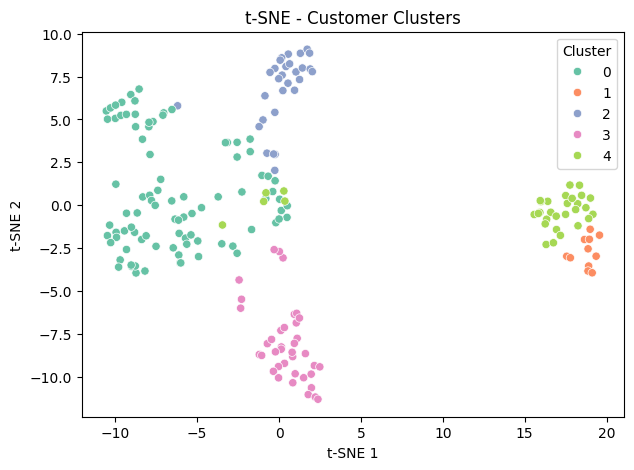

In [10]:
# 7. t-SNE Visualization

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(df.drop("Cluster", axis=1))

plt.figure(figsize=(7, 5))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df["Cluster"], palette="Set2")
plt.title("t-SNE - Customer Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

In [11]:
# 8. Cluster Summary & Marketing Strategy

cluster_summary = df.groupby("Cluster").mean()
print("Cluster Summary:\n", cluster_summary)

print("""
 Suggested Marketing Strategies per Cluster:
- Cluster 0: Low income, low spenders → Budget promotions & awareness campaigns
- Cluster 1: High income, high spenders → Premium loyalty programs & luxury offers
- Cluster 2: Young moderate spenders → Lifestyle & trend-focused marketing
- Cluster 3: Mid-income, high spenders → Personalized recommendations & upselling
- Cluster 4: Low income, high spenders → Special offers, discount loyalty plans
""")

Cluster Summary:
             Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.382022  46.213483           47.719101               41.797753
1        0.454545  32.454545          108.181818               82.727273
2        0.482759  24.689655           29.586207               73.655172
3        0.526316  40.394737           87.000000               18.631579
4        0.454545  31.787879           76.090909               77.757576

 Suggested Marketing Strategies per Cluster:
- Cluster 0: Low income, low spenders → Budget promotions & awareness campaigns
- Cluster 1: High income, high spenders → Premium loyalty programs & luxury offers
- Cluster 2: Young moderate spenders → Lifestyle & trend-focused marketing
- Cluster 3: Mid-income, high spenders → Personalized recommendations & upselling
- Cluster 4: Low income, high spenders → Special offers, discount loyalty plans

